In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics
import scipy.stats as stats

plt.style.use('seaborn')
sns.set(font_scale=2)
pd.set_option('display.max_columns', 500)

In [60]:
def analysis(col):
    temp = train[col].value_counts()
    temp = temp[temp > temp.iloc[20]].index
    #temp = train.index
    temp_df = train[train[col].isin(temp)]
    #temp_df = temp_df.sample(1000)
    #temp_df = train
    p = temp_df.HasDetections.mean()
    q = 1-p
    random_data = pd.Series(np.random.choice([1,0], len(temp_df),p=[p,q]), index = temp_df.index).rename('HasDetections')
    temp_df['random_data'] = random_data
    
    #temp_df.groupby(col).HasDetections.mean().plot(kind = 'bar', figsize=(20,10))
    temp_df.groupby(col)[['HasDetections', 'random_data']].mean().plot(kind = 'bar', figsize=(20,10))
    plt.title('Percent of Has detections by {}'.format(col))
    
    display(pd.DataFrame({'train_data': temp_df.groupby(col).HasDetections.mean(),
                         'random_data': temp_df.groupby(col).random_data.mean()}))
    return stats.ks_2samp(temp_df.groupby(col).HasDetections.mean(),
                temp_df.groupby(col).random_data.mean())




In [17]:
COLS = [
    'HasDetections',
    'GeoNameIdentifier',
    'CountryIdentifier'
]

In [11]:
train = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS)

In [15]:
#top 20 contries analysis

,train_data,random_data
GeoNameIdentifier,,
10.0,0.511848,0.502010
35.0,0.507216,0.504244
52.0,0.510999,0.506084
53.0,0.517883,0.503966
57.0,0.540070,0.502727
89.0,0.473733,0.502439
98.0,0.452187,0.504801
119.0,0.495623,0.502381
120.0,0.592210,0.502494


Ks_2sampResult(statistic=0.5, pvalue=0.008161678659143069)

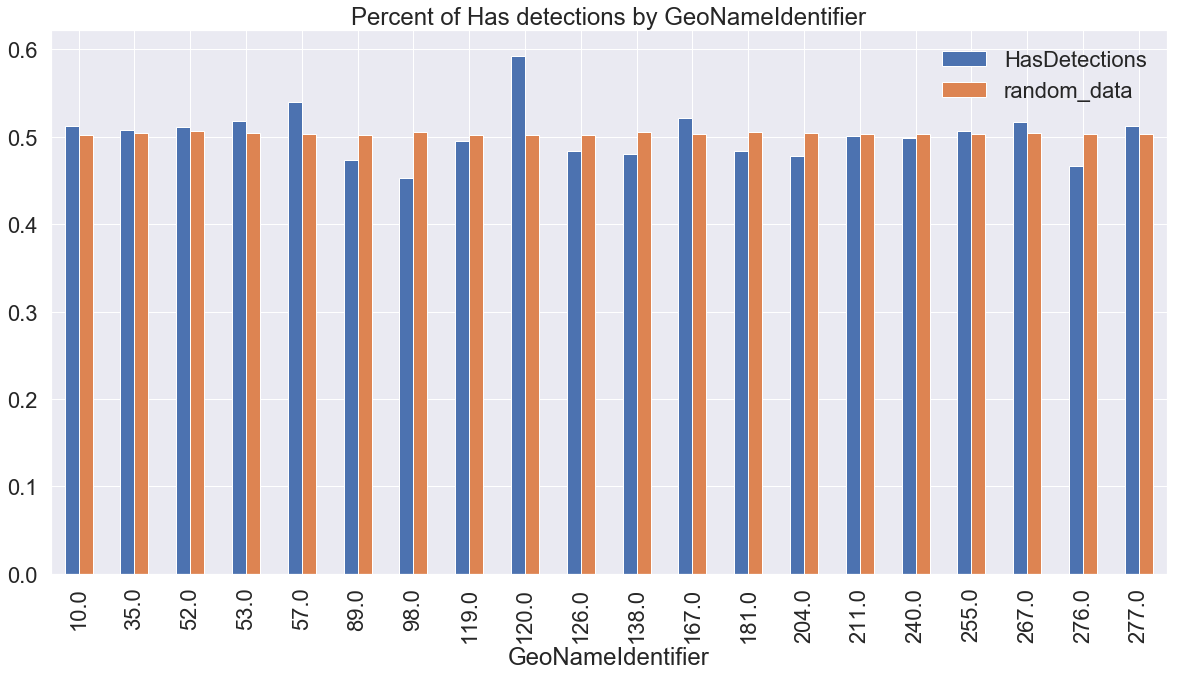

In [61]:
analysis(COLS[1])

In [19]:
#from the histogram, we see there is a difference in top 4 counties

,train_data,random_data
CountryIdentifier,,
9,0.506709,0.510052
29,0.505318,0.508818
41,0.507615,0.507846
43,0.512030,0.509779
44,0.533652,0.508317
51,0.478736,0.509916
60,0.492523,0.510016
66,0.484162,0.511945
68,0.479183,0.507923


Ks_2sampResult(statistic=0.55, pvalue=0.0025706143095149737)

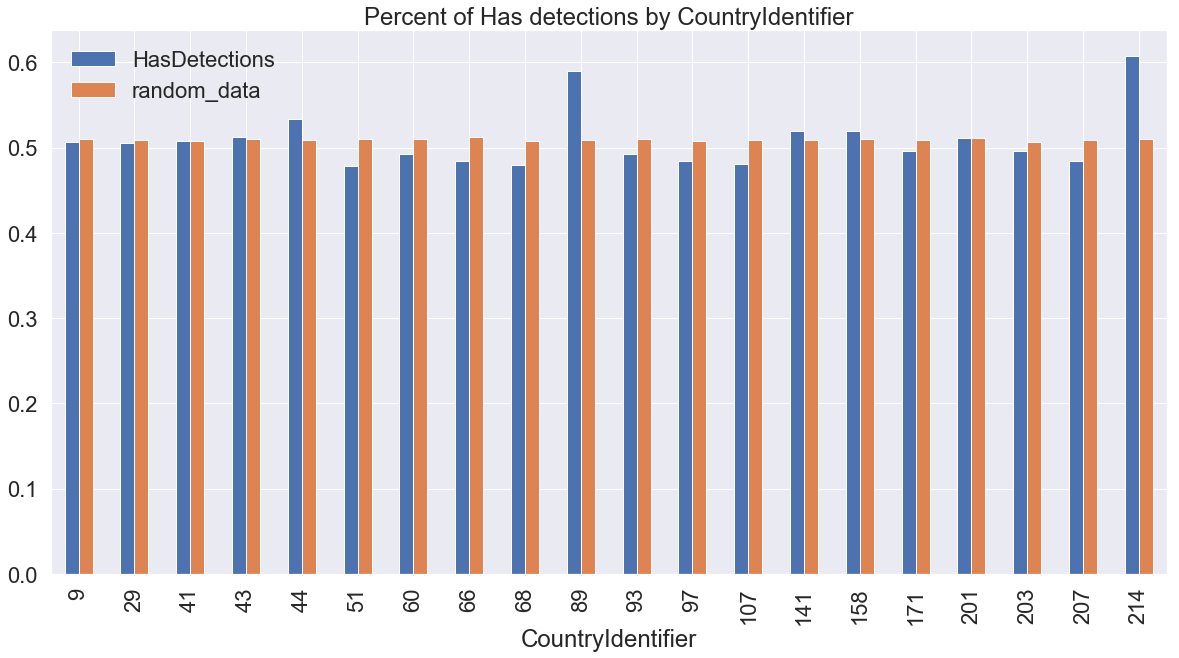

In [62]:
analysis(COLS[2])

In [54]:
# spotting from histogram, significant difference found. Do detailed investigation